# Task 2 Evaluation for Prediction of Column Types

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

Initialize label list 

In [2]:
label_list = ['person_name', 'business_name', 'phone_number', 'address', 'street_name', 'city', 'neighborhood',
              'lat_lon_cord', 'zip_code', 'borough', 'school_name', 'color', 'car_make', 'city_agency', 'area_of_study',
              'subject_in_school', 'school_level', 'college_name', 'website', 'building_classification', 'vehicle_type',
              'location_type', 'park_playground', 'other']

Read data from real_label and predict_label and join them

In [3]:
true_label = pd.read_csv("real_label.csv")
pred_label_with_column_name = pd.read_csv("predict_label_with_column_name.csv")
pred_label_without_column_name = pd.read_csv("predict_label_without_column_name.csv")
result = pd.merge(true_label, pred_label_with_column_name, how='inner', on='column_name')
result = pd.merge(result, pred_label_without_column_name, how='inner', on='column_name')

In [4]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

Calculate the precision and recall for all labels

In [5]:
precision = []
precision_without = []
recall = []
recall_without = []
true_count = []
pred_with_label_count = []
pred_without_label_count = []
for label in label_list:
    true_count.append(len(result[result['true_label'].str.contains(label)]))
    pred_with_label_count.append(len(result[result['predict_label_with_column_name'].str.contains(label)]))
    pred_without_label_count.append(len(result[result['predict_label_without_column_name'].str.contains(label)]))
    TP = len(result[result['true_label'].str.contains(label) & result['predict_label_with_column_name'].str.contains(label)])
    TP_without = len(result[result['true_label'].str.contains(label) & result['predict_label_without_column_name'].str.contains(label)])
    all_pred = len(result[result['predict_label_with_column_name'].str.contains(label)])
    all_pred_without = len(result[result['predict_label_without_column_name'].str.contains(label)])
    all_actual = len(result[result['true_label'].str.contains(label)])
    precision.append(float(TP) / all_pred if all_pred != 0 else 0)
    precision_without.append(float(TP_without) / all_pred_without if all_pred_without != 0 else 0)
    recall.append(float(TP) / all_actual if all_actual != 0 else 0)
    recall_without.append(float(TP_without) / all_actual if all_actual != 0 else 0)

In [6]:
label_type_count_with = [0, 0, 0]
label_type_count_without = [0, 0, 0]
type_labels = ["one", "two", "three or more"]
for index, row in result.iterrows():
    if len(row['predict_label_with_column_name'].split("|")) == 1:
        label_type_count_with[0] += 1
    if len(row['predict_label_with_column_name'].split("|")) == 2:
        label_type_count_with[1] += 1
    if len(row['predict_label_with_column_name'].split("|")) >= 3:
        label_type_count_with[2] += 1
    if len(row['predict_label_without_column_name'].split("|")) == 1:
        label_type_count_without[0] += 1
    if len(row['predict_label_without_column_name'].split("|")) == 2:
        label_type_count_without[1] += 1
    if len(row['predict_label_without_column_name'].split("|")) >= 3:
        label_type_count_without[2] += 1

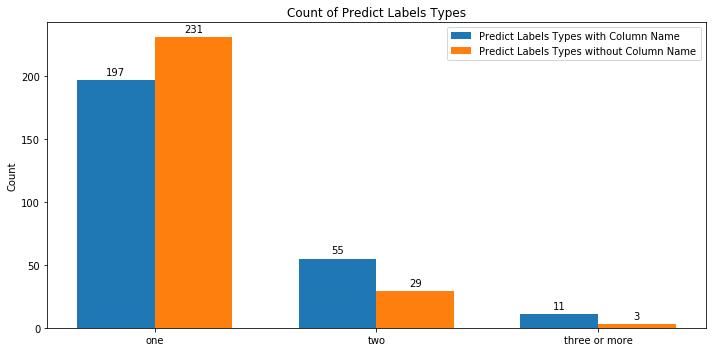

In [7]:
x = np.arange(len(type_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))

rects1 = ax.bar(x - width/2, label_type_count_with, width, label='Predict Labels Types with Column Name')
rects2 = ax.bar(x + width/2, label_type_count_without, width, label='Predict Labels Types without Column Name')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count of Predict Labels Types')
ax.set_xticks(x)
ax.set_xticklabels(type_labels)
ax.legend()
autolabel(rects1)
autolabel(rects2)
plt.legend(loc='best')
fig.tight_layout()
plt.savefig('./figures/task2/pred_label_type_count.png')
plt.show()

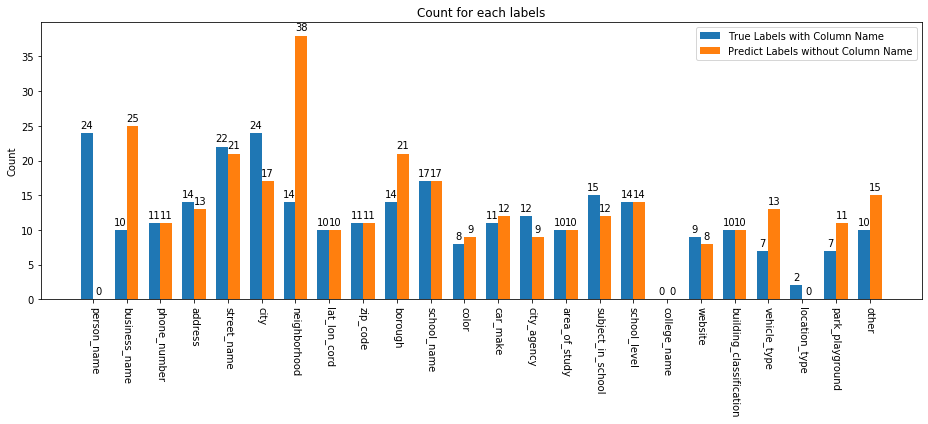

In [8]:
x = np.arange(len(label_list))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(13,6))

rects1 = ax.bar(x - width/2, true_count, width, label='True Labels with Column Name')
rects2 = ax.bar(x + width/2, pred_without_label_count, width, label='Predict Labels without Column Name')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count for each labels')
ax.set_xticks(x)
ax.set_xticklabels(label_list)
ax.legend()
autolabel(rects1)
autolabel(rects2)
plt.xticks(rotation=270)
plt.legend(loc='best')
fig.tight_layout()
plt.savefig('./figures/task2/true_and_predict_without_column_name.png')
plt.show()

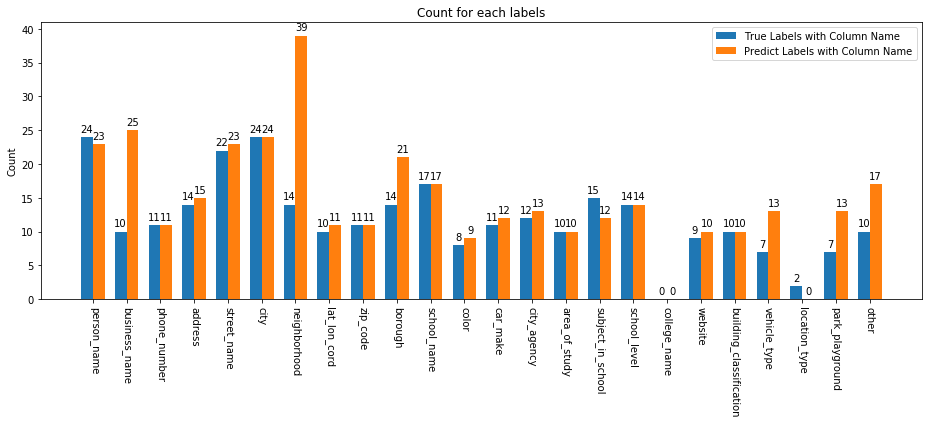

In [9]:
x = np.arange(len(label_list))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(13,6))

rects1 = ax.bar(x - width/2, true_count, width, label='True Labels with Column Name')
rects2 = ax.bar(x + width/2, pred_with_label_count, width, label='Predict Labels with Column Name')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count for each labels')
ax.set_xticks(x)
ax.set_xticklabels(label_list)
ax.legend()
autolabel(rects1)
autolabel(rects2)
plt.xticks(rotation=270)
plt.legend(loc='best')
fig.tight_layout()
plt.savefig('./figures/task2/true_and_predict_with_column_name.png')
plt.show()

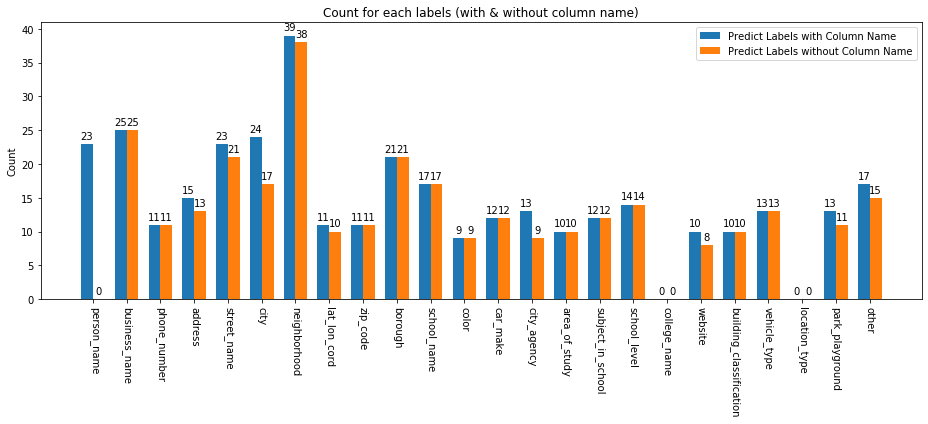

In [10]:
x = np.arange(len(label_list))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(13,6))

rects1 = ax.bar(x - width/2, pred_with_label_count, width, label='Predict Labels with Column Name')
rects2 = ax.bar(x + width/2, pred_without_label_count, width, label='Predict Labels without Column Name')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count for each labels (with & without column name)')
ax.set_xticks(x)
ax.set_xticklabels(label_list)
ax.legend()
autolabel(rects1)
autolabel(rects2)
plt.xticks(rotation=270)
plt.legend(loc='best')
fig.tight_layout()
plt.savefig('./figures/task2/pred_label_count.png')
plt.show()

In [11]:
res_data = pd.DataFrame({'label': label_list, 
                         'precision': precision, 
                         'recall': recall, 
                         'precision_without': precision_without, 
                         'recall_without': recall_without})

Draw the scatter graph for all the labels with precision and recall

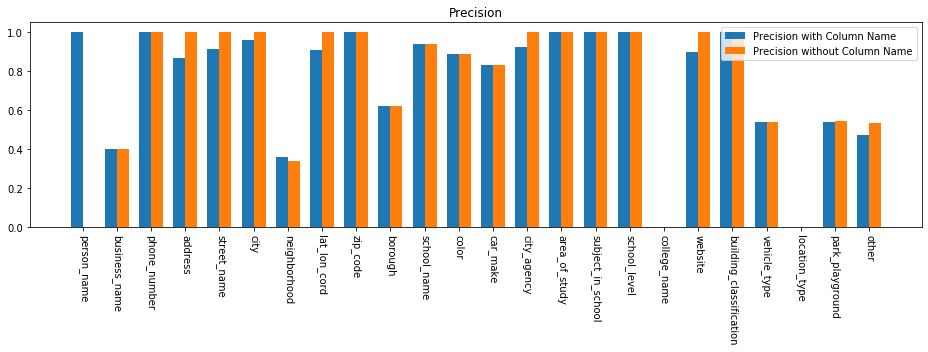

In [12]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.bar(x - width/2, precision, width, label='Precision with Column Name')
ax.bar(x + width/2, precision_without, width, label='Precision without Column Name')
ax.set_title('Precision')
ax.set_xticks(x)
ax.set_xticklabels(label_list)
ax.legend()
plt.xticks(rotation=270)
plt.legend(loc='best')
fig.tight_layout()
plt.savefig('./figures/task2/precision.png')
plt.show()

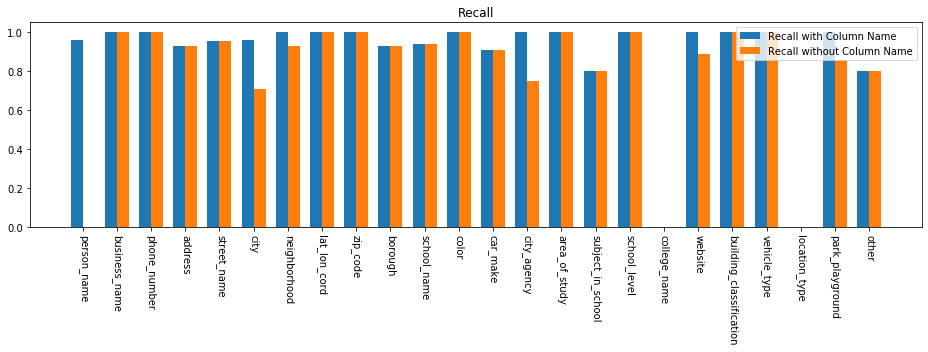

In [13]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.bar(x - width/2, recall, width, label='Recall with Column Name')
ax.bar(x + width/2, recall_without, width, label='Recall without Column Name')
ax.set_title('Recall')
ax.set_xticks(x)
ax.set_xticklabels(label_list)
ax.legend()
plt.xticks(rotation=270)
plt.legend(loc='best')
fig.tight_layout()
plt.savefig('./figures/task2/recall.png')
plt.show()